In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns

# Load Data

In [4]:
transaction = pd.read_csv("data/yearlyorgpayment_perperson.csv")
ticket = pd.read_csv("data/org_yearly_tk_pperson_v2.csv")
donor = pd.read_csv("data/cleaned_year_donation.csv")

# Data Cleaning 

## Ticket

In [4]:
ticket.dropna(inplace = True)

## Transaction

In [5]:
transaction.year = transaction.year.astype(str)
transaction = transaction.pivot(index = ["org_id"], 
                     columns = ["year"],
                     values = [c for c in transaction.columns if c not in ["org_id","year"]]).reset_index()
transaction.columns = ["_".join(x) if x[0] !="org_id" else x[0] for x in transaction.columns.ravel()]

In [18]:
transaction

,org_id,paymentamount_sum_2015,paymentamount_sum_2016,paymentamount_sum_2017,paymentamount_sum_2018,paymentamount_sum_2019,paymentamount_sum_2020,paymentamount_sum_2021,paymentamount_mean_2015,paymentamount_mean_2016,...,paymentamount_var_2019,paymentamount_var_2020,paymentamount_var_2021,paymentamount_size_2015,paymentamount_size_2016,paymentamount_size_2017,paymentamount_size_2018,paymentamount_size_2019,paymentamount_size_2020,paymentamount_size_2021
0,ARKANSAS,2.886711e+07,4.045171e+07,4.272176e+07,2.626662e+07,3.026943e+07,2.483779e+07,8448061.07,1621.747596,2315.893222,...,1.300743e+09,2.373765e+08,9.896066e+07,17800.0,17467.0,20257.0,15362.0,13528.0,11119.0,5622.0
1,ARMY,9.963971e+06,1.188788e+07,1.206905e+07,1.134590e+07,1.180038e+07,8.113368e+06,NaN,1671.526828,1895.993459,...,1.342687e+08,4.528172e+08,NaN,5961.0,6270.0,6909.0,7171.0,7775.0,4820.0,NaN
2,BAYLOR,1.283125e+07,1.298146e+07,1.520016e+07,1.236232e+07,1.608197e+07,7.727839e+06,NaN,2028.015418,1708.536317,...,4.205947e+07,1.434128e+07,NaN,6327.0,7598.0,7267.0,6272.0,6398.0,6505.0,NaN
3,CFL,NaN,NaN,2.070533e+06,2.144860e+05,1.054817e+05,1.918410e+05,NaN,NaN,NaN,...,9.135858e+06,8.959015e+06,NaN,NaN,NaN,1316.0,274.0,128.0,405.0,NaN
4,CLEMSON,9.158205e+07,1.156109e+08,1.487797e+08,1.001661e+08,1.177670e+08,8.294011e+07,26483197.58,4030.900031,4804.107769,...,1.257531e+09,3.364416e+08,1.120627e+08,22720.0,24065.0,27091.0,23410.0,24280.0,22087.0,14153.0
5,COLORADO,1.493381e+07,1.633880e+07,1.543304e+07,1.307619e+07,1.979536e+07,7.355024e+06,0.00,1859.288596,2123.576206,...,5.639530e+08,6.456215e+07,NaN,8032.0,7694.0,6910.0,6554.0,9448.0,6224.0,1.0
6,ECU,1.141418e+07,1.282404e+07,1.558085e+07,9.541934e+06,1.563598e+07,7.702791e+06,NaN,618.889431,713.437517,...,2.967956e+08,3.477909e+07,NaN,18443.0,17975.0,16054.0,13673.0,12589.0,8722.0,NaN
7,FRESNO,6.805051e+06,6.538226e+06,6.419124e+06,7.411469e+06,8.843064e+06,3.272962e+06,0.00,1826.369037,1934.958869,...,4.608427e+07,1.532851e+07,0.000000e+00,3726.0,3379.0,3428.0,3777.0,4258.0,2289.0,3.0
8,FSU,5.790646e+07,8.045937e+07,8.544447e+07,6.133932e+07,8.030302e+07,6.793956e+07,13343421.46,3745.808645,4860.712200,...,9.572425e+09,1.580550e+09,9.998353e+07,15459.0,16553.0,15412.0,13722.0,14329.0,16356.0,7986.0
9,KANSAS,9.578609e+07,6.028857e+07,8.495601e+07,7.184034e+07,8.493281e+07,6.902823e+07,10288705.54,11519.673645,8620.041407,...,6.566898e+10,8.479326e+10,3.286079e+08,8315.0,6994.0,6402.0,6051.0,6895.0,5024.0,16862.0


In [6]:
trans_kept_year = [str(c) for c in list(range(2015,2021))]
trans_kept_years_cols = [c for c in transaction.columns if c[-4:] in trans_kept_year]
transaction_v2 = transaction[["org_id"] +trans_kept_years_cols].copy()
transaction_v2.dropna(inplace = True)
transaction_v2

,org_id,paymentamount_sum_2015,paymentamount_sum_2016,paymentamount_sum_2017,paymentamount_sum_2018,paymentamount_sum_2019,paymentamount_sum_2020,paymentamount_mean_2015,paymentamount_mean_2016,paymentamount_mean_2017,...,paymentamount_var_2017,paymentamount_var_2018,paymentamount_var_2019,paymentamount_var_2020,paymentamount_size_2015,paymentamount_size_2016,paymentamount_size_2017,paymentamount_size_2018,paymentamount_size_2019,paymentamount_size_2020
0,ARKANSAS,2.886711e+07,4.045171e+07,4.272176e+07,2.626662e+07,3.026943e+07,2.483779e+07,1621.747596,2315.893222,2108.987590,...,1.160548e+09,6.180252e+08,1.300743e+09,2.373765e+08,17800.0,17467.0,20257.0,15362.0,13528.0,11119.0
1,ARMY,9.963971e+06,1.188788e+07,1.206905e+07,1.134590e+07,1.180038e+07,8.113368e+06,1671.526828,1895.993459,1746.859751,...,3.605843e+08,7.665827e+08,1.342687e+08,4.528172e+08,5961.0,6270.0,6909.0,7171.0,7775.0,4820.0
2,BAYLOR,1.283125e+07,1.298146e+07,1.520016e+07,1.236232e+07,1.608197e+07,7.727839e+06,2028.015418,1708.536317,2091.669384,...,4.276846e+07,2.440988e+07,4.205947e+07,1.434128e+07,6327.0,7598.0,7267.0,6272.0,6398.0,6505.0
4,CLEMSON,9.158205e+07,1.156109e+08,1.487797e+08,1.001661e+08,1.177670e+08,8.294011e+07,4030.900031,4804.107769,5491.849157,...,3.207121e+09,2.173669e+09,1.257531e+09,3.364416e+08,22720.0,24065.0,27091.0,23410.0,24280.0,22087.0
5,COLORADO,1.493381e+07,1.633880e+07,1.543304e+07,1.307619e+07,1.979536e+07,7.355024e+06,1859.288596,2123.576206,2233.434948,...,3.862440e+08,6.587528e+08,5.639530e+08,6.456215e+07,8032.0,7694.0,6910.0,6554.0,9448.0,6224.0
6,ECU,1.141418e+07,1.282404e+07,1.558085e+07,9.541934e+06,1.563598e+07,7.702791e+06,618.889431,713.437517,970.527458,...,4.779782e+08,3.145553e+07,2.967956e+08,3.477909e+07,18443.0,17975.0,16054.0,13673.0,12589.0,8722.0
7,FRESNO,6.805051e+06,6.538226e+06,6.419124e+06,7.411469e+06,8.843064e+06,3.272962e+06,1826.369037,1934.958869,1872.556616,...,8.927958e+07,1.524525e+08,4.608427e+07,1.532851e+07,3726.0,3379.0,3428.0,3777.0,4258.0,2289.0
8,FSU,5.790646e+07,8.045937e+07,8.544447e+07,6.133932e+07,8.030302e+07,6.793956e+07,3745.808645,4860.712200,5544.022161,...,6.048617e+09,2.556048e+09,9.572425e+09,1.580550e+09,15459.0,16553.0,15412.0,13722.0,14329.0,16356.0
9,KANSAS,9.578609e+07,6.028857e+07,8.495601e+07,7.184034e+07,8.493281e+07,6.902823e+07,11519.673645,8620.041407,13270.230220,...,6.003215e+09,7.268172e+10,6.566898e+10,8.479326e+10,8315.0,6994.0,6402.0,6051.0,6895.0,5024.0
10,KSU,3.045321e+07,2.948577e+07,3.542591e+07,2.465952e+07,5.624730e+07,2.152509e+07,3286.554072,3404.430305,4034.841645,...,1.402050e+09,3.507136e+08,1.872858e+10,1.348140e+09,9266.0,8661.0,8780.0,8892.0,9463.0,9010.0


## Donor

In [7]:
donor.year = donor.year.astype(str)
donor = donor.pivot(index = ["org_id"], 
                     columns = ["year"],
                     values = [c for c in donor.columns if c not in ["org_id","year"]]).reset_index()
donor.columns = ["_".join(x) if x[0] !="org_id" else x[0] for x in donor.columns.ravel()]

In [8]:
donor

,org_id,total_donated_sum_1999,total_donated_sum_2000,total_donated_sum_2001,total_donated_sum_2002,total_donated_sum_2003,total_donated_sum_2004,total_donated_sum_2005,total_donated_sum_2006,total_donated_sum_2007,...,total_pledged_max_2014,total_pledged_max_2015,total_pledged_max_2016,total_pledged_max_2017,total_pledged_max_2018,total_pledged_max_2019,total_pledged_max_2020,total_pledged_max_2021,total_pledged_max_2022,total_pledged_max_2023
0,ARKANSAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,110000.00,110000.0,100000.00,110000.00,110000.00,100000.00,150000.00,150000.0,NaN,NaN
1,ARMY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100000.00,49275.00,25000.0,NaN,NaN
2,BAYLOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100000.00,94200.00,94200.00,NaN,NaN,NaN
3,CFL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10000.00,10000.00,0.00,10000.00,NaN,NaN,NaN
4,COLORADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1366167.24,1002378.0,699404.50,1405950.00,2546352.69,1335280.00,301850.00,NaN,NaN,NaN
5,ECU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,73600.00,57415.60,93410.53,64250.00,30000.00,NaN,NaN,NaN
6,FRESNO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50000.00,55000.00,45000.00,80000.00,55000.00,NaN,NaN,NaN
7,KSU,NaN,NaN,NaN,NaN,8349271.98,8508820.68,8358878.06,8750808.28,11809660.91,...,182600.00,190900.0,186900.00,189500.00,225970.00,184300.00,169900.00,140000.0,NaN,NaN
8,MICH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,615753.64,669749.5,2000000.00,1142000.00,2106821.43,3452453.23,3383333.33,4341000.0,4275000.0,4275000.0
9,MSSTATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,522461.73,578720.01,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
donor_kept_year = [str(c) for c in list(range(2018,2021))]
donor_kept_years_cols = [c for c in donor.columns if c[-4:] in donor_kept_year]
donor_v2 = donor[["org_id"] +donor_kept_years_cols].copy()
donor_v2.dropna(inplace = True)
donor_v2

,org_id,total_donated_sum_2018,total_donated_sum_2019,total_donated_sum_2020,total_donated_median_2018,total_donated_median_2019,total_donated_median_2020,total_donated_mean_2018,total_donated_mean_2019,total_donated_mean_2020,...,total_pledged_mean_2020,total_pledged_var_2018,total_pledged_var_2019,total_pledged_var_2020,total_pledged_min_2018,total_pledged_min_2019,total_pledged_min_2020,total_pledged_max_2018,total_pledged_max_2019,total_pledged_max_2020
0,ARKANSAS,18050755.82,16586403.40,14604677.78,850.0,300.0,400.000,1857.838186,1246.441978,1417.104384,...,1461.881912,1.206519e+07,8.375796e+06,1.131044e+07,50.0,15.0,15.0,110000.00,100000.00,150000.00
2,BAYLOR,14470727.71,14020166.56,11158147.94,750.0,400.0,200.000,2855.313281,2348.830049,1753.874244,...,2385.577528,4.687933e+07,3.984914e+07,4.021985e+07,0.0,0.0,0.0,100000.00,94200.00,94200.00
3,CFL,183220.00,198882.80,72866.79,150.0,131.0,75.000,769.831933,1274.889744,369.882183,...,394.977360,4.201672e+05,0.000000e+00,1.900934e+06,0.0,0.0,50.0,10000.00,0.00,10000.00
4,COLORADO,19492020.78,17215104.29,7876658.66,300.0,250.0,150.000,2836.028049,2075.109003,1235.748142,...,1308.089125,1.295976e+09,4.882463e+08,6.363041e+07,0.0,0.0,0.0,2546352.69,1335280.00,301850.00
5,ECU,8362287.56,8338815.69,5482821.48,100.0,100.0,500.000,612.262964,668.013754,1273.593840,...,1432.692256,4.241389e+06,4.161001e+06,6.198330e+06,0.0,0.0,0.0,93410.53,64250.00,30000.00
6,FRESNO,4191970.75,4630409.53,2934977.27,600.0,500.0,550.000,1599.378386,1454.274350,1610.854704,...,1743.274973,1.002592e+07,1.070690e+07,1.300752e+07,1.0,1.0,10.0,45000.00,80000.00,55000.00
7,KSU,20145362.10,19861236.92,17012400.31,550.0,600.0,600.000,2416.670118,2544.355229,2520.729043,...,1671.534620,6.338893e+07,6.626443e+07,5.675098e+07,50.0,50.0,0.0,225970.00,184300.00,169900.00
8,MICH,39180596.07,35966023.07,33976790.68,250.0,300.0,250.000,2740.285080,2889.997836,2580.450420,...,3039.054886,9.054107e+08,2.456690e+09,1.916169e+09,0.0,0.0,0.0,2106821.43,3452453.23,3383333.33
10,NCSU,13022552.83,12691076.63,11411184.32,360.0,400.0,432.000,1061.246258,1080.459444,1118.743561,...,1176.358312,1.032862e+07,5.386301e+06,4.734075e+06,5.0,5.0,10.0,257200.00,75000.00,50089.00
12,OKLAHOMA,34615581.35,47458809.20,41939156.33,1000.0,1000.0,1500.000,3067.397550,4338.892777,7316.670679,...,7497.453599,6.097819e+07,3.443365e+08,7.825722e+08,-500.0,50.0,0.0,202665.00,927250.00,1029188.76


# Join Data

In [10]:
org_features = pd.merge(transaction_v2, ticket, on = "org_id")

In [11]:
org_features = pd.merge(donor_v2, org_features, on = "org_id")

In [12]:
kept_years = [str(c) for c in list(range(2015,2021))]
kept_years_cols = [c for c in org_features.columns if c[-4:] in kept_years]
kept_years_cols

['total_donated_sum_2018',
 'total_donated_sum_2019',
 'total_donated_sum_2020',
 'total_donated_median_2018',
 'total_donated_median_2019',
 'total_donated_median_2020',
 'total_donated_mean_2018',
 'total_donated_mean_2019',
 'total_donated_mean_2020',
 'total_donated_var_2018',
 'total_donated_var_2019',
 'total_donated_var_2020',
 'total_donated_min_2018',
 'total_donated_min_2019',
 'total_donated_min_2020',
 'total_donated_max_2018',
 'total_donated_max_2019',
 'total_donated_max_2020',
 'total_pledged_sum_2018',
 'total_pledged_sum_2019',
 'total_pledged_sum_2020',
 'total_pledged_median_2018',
 'total_pledged_median_2019',
 'total_pledged_median_2020',
 'total_pledged_mean_2018',
 'total_pledged_mean_2019',
 'total_pledged_mean_2020',
 'total_pledged_var_2018',
 'total_pledged_var_2019',
 'total_pledged_var_2020',
 'total_pledged_min_2018',
 'total_pledged_min_2019',
 'total_pledged_min_2020',
 'total_pledged_max_2018',
 'total_pledged_max_2019',
 'total_pledged_max_2020',
 'pa

In [13]:
org_features.columns

Index(['org_id', 'total_donated_sum_2018', 'total_donated_sum_2019',
       'total_donated_sum_2020', 'total_donated_median_2018',
       'total_donated_median_2019', 'total_donated_median_2020',
       'total_donated_mean_2018', 'total_donated_mean_2019',
       'total_donated_mean_2020',
       ...
       'total_pay_all_small_min_2020', 'total_pay_all_small_max_2018',
       'total_pay_all_small_max_2019', 'total_pay_all_small_max_2020',
       'total_pay_all_small_var_2018', 'total_pay_all_small_var_2019',
       'total_pay_all_small_var_2020', 'total_pay_all_small_size_2018',
       'total_pay_all_small_size_2019', 'total_pay_all_small_size_2020'],
      dtype='object', length=121)

In [30]:
len(org_features.columns)

121

In [14]:
org_features = org_features[["org_id"]+kept_years_cols].copy()

In [15]:
org_features.dropna(axis = 1, inplace = True)

In [17]:
org_features.to_csv("pca_all_cols.csv")

# Generate PCA

In [18]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.1, point['y']+.1, str(point['val']),fontsize= 15)

def pca_plot(df_plot, figsize, xlim, ylim, title, figtitle):
    fig , ax1 = plt.subplots(figsize=figsize)

    ax1.set_xlim(xlim[0],xlim[1])
    ax1.set_ylim(ylim[0],ylim[1])

    # Plot Principal Components 1 and 2
    sns.scatterplot(x = "PC1", y = "PC2",data = df_plot, s = 100)

    # Plot reference lines
    ax1.hlines(0,xlim[0],xlim[1], linestyles='dotted', colors='grey')
    ax1.vlines(0,ylim[0],ylim[1], linestyles='dotted', colors='grey')
    ax1.tick_params(axis='x', labelsize=15)
    ax1.tick_params(axis='y', labelsize=15)
#     ax1.set_xticklabels(labels = x_label, fontsize = 15)

    ax1.set_xlabel('First Principal Component',fontsize= 15)
    ax1.set_ylabel('Second Principal Component',fontsize= 15)
    ax1.set_title(title,fontsize= 20)
    label_point(df_plot.PC1, df_plot.PC2, df_plot.org_id, plt.gca())  
    fig.savefig(f'PCA/{figtitle}.png',bbox_inches='tight')

## All Data

### PCA Plot

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


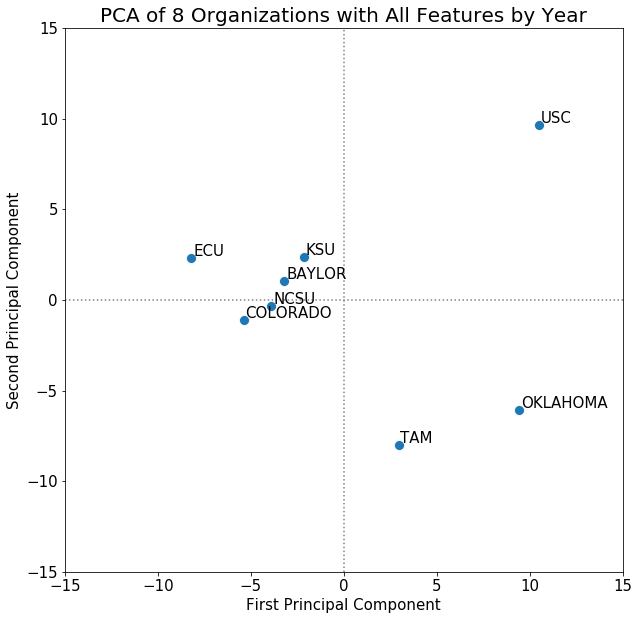

In [32]:
pca = PCA()
data = org_features.drop("org_id", axis =1)
data = pd.DataFrame(scale(data), index=data.index, columns=data.columns)
df_plot = pd.DataFrame(pca.fit_transform(data), 
                       columns=['PC'+str(i+1) for i in range(8)], 
                       index=data.index)
sim_df = pd.concat([org_features,df_plot], axis = 1)
pca_plot(sim_df, 
         figsize = (10,10),
         xlim = (-15, 15), 
         ylim = (-15,15),
         title = "PCA of 8 Organizations with All Features by Year",
         figtitle = "PCA_all_data")

### PCA  Loadings

In [34]:
pca_loadings = pd.DataFrame(PCA().fit(data).components_.T, 
                            index=data.columns, 
                            columns=['V'+str(i+1) for i in range(8)])

## Transaction 

In [33]:
def label_point_trans(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['val'] == 'NCSU':
            ax.text(point['x']-1, point['y']+.1, str(point['val']),fontsize= 15)
        elif point['val'] == 'BAYLOR':
            ax.text(point['x']+.2, point['y']-0.15, str(point['val']),fontsize= 15)
        elif point['val'] == 'ARMY':
            ax.text(point['x']-2, point['y']-0.05, str(point['val']),fontsize= 15)
        elif point['val'] == 'COLORADO':
            ax.text(point['x']+.2, point['y']-0.01, str(point['val']),fontsize= 15)
        else:
            ax.text(point['x']+.1, point['y']+.1, str(point['val']),fontsize= 15)

def pca_plot_trans(df_plot, figsize, xlim, ylim, title,figtitle):
    fig , ax1 = plt.subplots(figsize=figsize)

    ax1.set_xlim(xlim[0],xlim[1])
    ax1.set_ylim(ylim[0],ylim[1])

    # Plot Principal Components 1 and 2
    sns.scatterplot(x = "PC1", y = "PC2",data = df_plot, s = 100)

    # Plot reference lines
    ax1.hlines(0,xlim[0],xlim[1], linestyles='dotted', colors='grey')
    ax1.vlines(0,ylim[0],ylim[1], linestyles='dotted', colors='grey')
    ax1.tick_params(axis='x', labelsize=15)
    ax1.tick_params(axis='y', labelsize=15)
#     ax1.set_xticklabels(labels = x_label, fontsize = 15)

    ax1.set_xlabel('First Principal Component',fontsize= 20)
    ax1.set_ylabel('Second Principal Component',fontsize= 20)
    ax1.set_title(title, fontsize= 20)
    label_point_trans(df_plot.PC1, df_plot.PC2, df_plot.org_id, plt.gca())  
    fig.savefig(f'PCA/{figtitle}.png',bbox_inches='tight')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


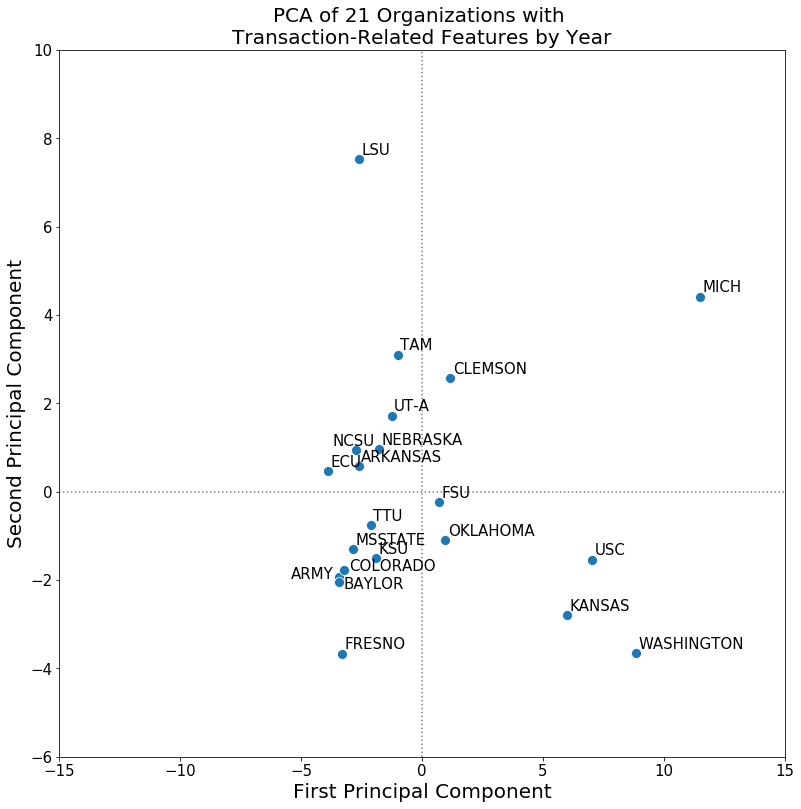

In [34]:
pca = PCA()
data_trans = transaction_v2.drop("org_id", axis =1)
data_trans = pd.DataFrame(scale(data_trans), index=data_trans.index, columns=data_trans.columns)
df_plot_trans = pd.DataFrame(pca.fit_transform(data_trans), 
                       columns=['PC'+str(i+1) for i in range(min(len(data_trans),len(data_trans.columns)))], 
                       index=data_trans.index)
sim_df_trans = pd.concat([transaction_v2,df_plot_trans], axis = 1)
pca_plot_trans(sim_df_trans,
               figsize=(13,13), 
               xlim = (-15,15), 
               ylim = (-6,10), 
               title = "PCA of 21 Organizations with \nTransaction-Related Features by Year",
               figtitle = "PCA_transaction")

In [19]:
transaction_v2.to_csv("pca_transaction_cols.csv")

In [48]:
len(transaction_v2.columns)

43

## Donor

In [11]:
def label_point_donor(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['val'] == 'FRESNO':
            ax.text(point['x']-1, point['y']+.1, str(point['val']),fontsize= 18)
        else:
            ax.text(point['x']+.1, point['y']+.1, str(point['val']),fontsize= 15)

def pca_plot_donor(df_plot, figsize, xlim, ylim, title,figtitle):
    fig , ax1 = plt.subplots(figsize=figsize)

    ax1.set_xlim(xlim[0],xlim[1])
    ax1.set_ylim(ylim[0],ylim[1])

    # Plot Principal Components 1 and 2
    sns.scatterplot(x = "PC1", y = "PC2",data = df_plot, s = 100)

    # Plot reference lines
    ax1.hlines(0,xlim[0],xlim[1], linestyles='dotted', colors='grey')
    ax1.vlines(0,ylim[0],ylim[1], linestyles='dotted', colors='grey')
    ax1.tick_params(axis='x', labelsize=15)
    ax1.tick_params(axis='y', labelsize=15)
#     ax1.set_xticklabels(labels = x_label, fontsize = 15)

    ax1.set_xlabel('First Principal Component',fontsize= 20)
    ax1.set_ylabel('Second Principal Component',fontsize= 20)
    ax1.set_title(title, fontsize= 20)
    label_point_donor(df_plot.PC1, df_plot.PC2, df_plot.org_id, plt.gca())  
    fig.savefig(f'PCA/{figtitle}.png',bbox_inches='tight')

In [47]:
donor_v2.columns

Index(['org_id', 'total_donated_sum_2018', 'total_donated_sum_2019',
       'total_donated_sum_2020', 'total_donated_median_2018',
       'total_donated_median_2019', 'total_donated_median_2020',
       'total_donated_mean_2018', 'total_donated_mean_2019',
       'total_donated_mean_2020', 'total_donated_var_2018',
       'total_donated_var_2019', 'total_donated_var_2020',
       'total_donated_min_2018', 'total_donated_min_2019',
       'total_donated_min_2020', 'total_donated_max_2018',
       'total_donated_max_2019', 'total_donated_max_2020',
       'total_pledged_sum_2018', 'total_pledged_sum_2019',
       'total_pledged_sum_2020', 'total_pledged_median_2018',
       'total_pledged_median_2019', 'total_pledged_median_2020',
       'total_pledged_mean_2018', 'total_pledged_mean_2019',
       'total_pledged_mean_2020', 'total_pledged_var_2018',
       'total_pledged_var_2019', 'total_pledged_var_2020',
       'total_pledged_min_2018', 'total_pledged_min_2019',
       'total_pledged_

In [46]:
len(donor_v2.columns)

37

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


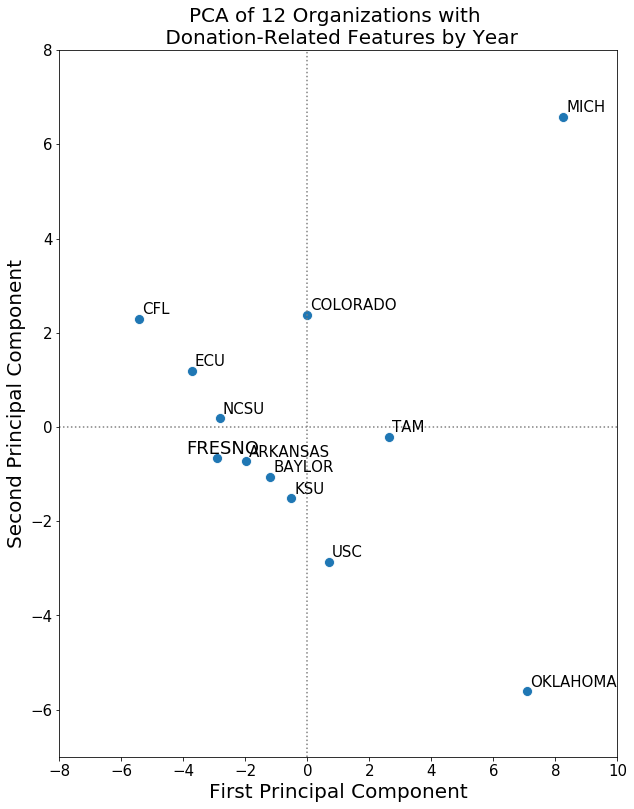

In [13]:
pca = PCA()
data_donor = donor_v2.drop("org_id", axis =1)
data_donor = pd.DataFrame(scale(data_donor), index=data_donor.index, columns=data_donor.columns)
df_plot_donor = pd.DataFrame(pca.fit_transform(data_donor), 
                       columns=['PC'+str(i+1) for i in range(min(len(data_donor),len(data_donor.columns)))], 
                       index=data_donor.index)
sim_df_donor = pd.concat([donor_v2,df_plot_donor], axis = 1)
pca_plot_donor(sim_df_donor,
         figsize=(10,13), 
         xlim = (-8,10), 
         ylim = (-7,8), 
         title = "PCA of 12 Organizations with \n Donation-Related Features by Year",
         figtitle = "PCA_donor")

In [23]:
donor_v2.to_csv("pca_donor_col.csv")

In [25]:
donor_v2.columns


Index(['org_id', 'total_donated_sum_2018', 'total_donated_sum_2019',
       'total_donated_sum_2020', 'total_donated_median_2018',
       'total_donated_median_2019', 'total_donated_median_2020',
       'total_donated_mean_2018', 'total_donated_mean_2019',
       'total_donated_mean_2020', 'total_donated_var_2018',
       'total_donated_var_2019', 'total_donated_var_2020',
       'total_donated_min_2018', 'total_donated_min_2019',
       'total_donated_min_2020', 'total_donated_max_2018',
       'total_donated_max_2019', 'total_donated_max_2020',
       'total_pledged_sum_2018', 'total_pledged_sum_2019',
       'total_pledged_sum_2020', 'total_pledged_median_2018',
       'total_pledged_median_2019', 'total_pledged_median_2020',
       'total_pledged_mean_2018', 'total_pledged_mean_2019',
       'total_pledged_mean_2020', 'total_pledged_var_2018',
       'total_pledged_var_2019', 'total_pledged_var_2020',
       'total_pledged_min_2018', 'total_pledged_min_2019',
       'total_pledged_

## Ticket

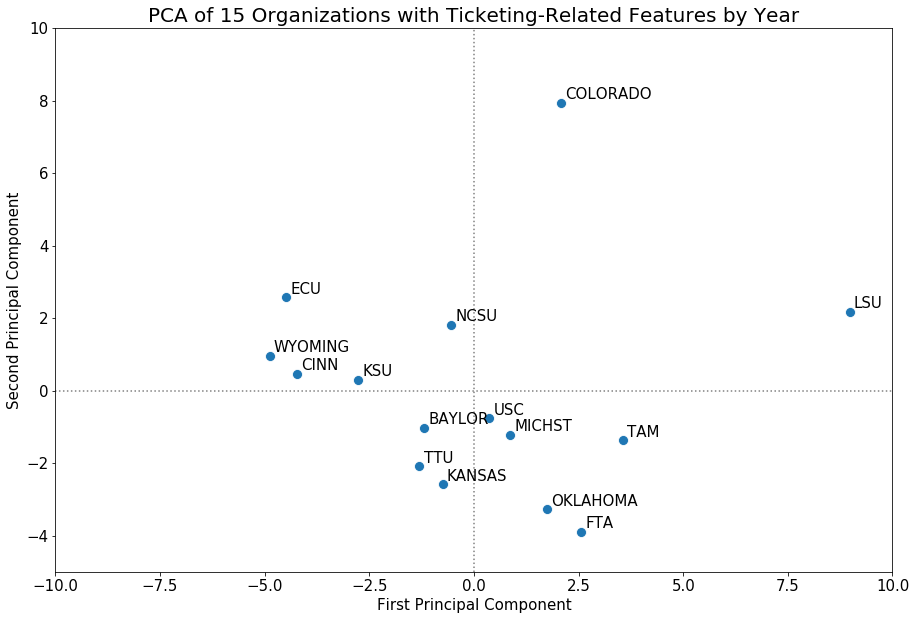

In [272]:
pca = PCA()
data_ticket = ticket.drop("org_id", axis =1)
data_ticket = pd.DataFrame(scale(data_ticket), index=data_ticket.index, columns=data_ticket.columns)
df_plot_ticket = pd.DataFrame(pca.fit_transform(data_ticket), 
                       columns=['PC'+str(i+1) for i in range(min(len(data_ticket),len(data_ticket.columns)))], 
                       index=data_ticket.index)
sim_df_ticket = pd.concat([ticket,df_plot_ticket], axis = 1)
pca_plot(sim_df_ticket, 
         figsize=(15,10), 
         xlim = (-10,10), ylim = (-5,10), 
         title = "PCA of 15 Organizations with Ticketing-Related Features by Year",
         figtitle = "PCA_ticket")

In [22]:
ticket.to_csv("pca_ticket_col.csv")

In [50]:
len(ticket.columns)

43